# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [1]:
# Import essential libraries for data manipulation and analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')


## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [2]:
# Importing the file porter_data_1.csv

df = pd.read_csv('porter_data_1.csv')
df.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

In [3]:
df.shape

(175777, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

In [5]:
df.describe()

market_id  store_primary_category  order_protocol    total_items  \
count  175777.000000           175777.000000   175777.000000  175777.000000   
mean        2.743726               35.887949        2.911752       3.204976   
std         1.330963               20.728254        1.513128       2.674055   
min         1.000000                0.000000        1.000000       1.000000   
25%         2.000000               18.000000        1.000000       2.000000   
50%         2.000000               38.000000        3.000000       3.000000   
75%         4.000000               55.000000        4.000000       4.000000   
max         6.000000               72.000000        7.000000     411.000000   

            subtotal  num_distinct_items  min_item_price  max_item_price  \
count  175777.000000       175777.000000   175777.000000   175777.000000   
mean     2697.111147            2.675060      684.965433     1160.158616   
std      1828.554893            1.625681      519.882924      560.828571   
min         0.000000            1.000000      -86.000000        0.000000   
25%      1412.000000            1.000000      299.000000      799.000000   
50%      2224.000000            2.000000      595.000000     1095.000000   
75%      3410.000000            3.000000      942.000000     1395.000000   
max     26800.000000           20.000000    14700.000000    14700.000000   

       total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
count          175777.000000       175777.000000             175777.000000   
mean               44.918664           41.861381                 58.230115   
std                34.544724           32.168505                 52.731043   
min                -4.000000           -5.000000                 -6.000000   
25%                17.000000           15.000000                 17.000000   
50%                37.000000           35.000000                 41.000000   
75%                66.000000           63.000000                 85.000000   
max               171.000000          154.000000                285.000000   

            distance  
count  175777.000000  
mean       21.843090  
std         8.748712  
min         0.000000  
25%        15.360000  
50%        21.760000  
75%        28.120000  
max        83.520000

In [6]:
df.isnull().sum()

market_id                   0
created_at                  0
actual_delivery_time        0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_dashers       0
total_busy_dashers          0
total_outstanding_orders    0
distance                    0
dtype: int64

In [7]:
df.notnull().sum()

market_id                   175777
created_at                  175777
actual_delivery_time        175777
store_primary_category      175777
order_protocol              175777
total_items                 175777
subtotal                    175777
num_distinct_items          175777
min_item_price              175777
max_item_price              175777
total_onshift_dashers       175777
total_busy_dashers          175777
total_outstanding_orders    175777
distance                    175777
dtype: int64

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [8]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  float64       
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

In [9]:
df.head()

market_id          created_at actual_delivery_time  store_primary_category  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                       4   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                      46   
2        2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                      36   
3        1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                      38   
4        1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                      38   

   order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0             1.0            4      3441                   4             557   
1             2.0            1      1900                   1            1400   
2             3.0            4      4771                   3             820   
3             1.0            1      1525                   1            1525   
4             1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  
0                      21.0     34.44  
1                       2.0     27.60  
2                      18.0     11.56  
3                       8.0     31.80  
4                       7.0      8.20

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [10]:
# Convert categorical features to category type
category_columns = ['market_id','store_primary_category','order_protocol']
df[category_columns] = df[category_columns].astype('int').astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  category      
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  category      
 4   order_protocol            175777 non-null  category      
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

In [11]:
df.head()

market_id          created_at actual_delivery_time store_primary_category  \
0         1 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1         2 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2         2 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3         1 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4         1 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0              1            4      3441                   4             557   
1              2            1      1900                   1            1400   
2              3            4      4771                   3             820   
3              1            1      1525                   1            1525   
4              1            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  
0                      21.0     34.44  
1                       2.0     27.60  
2                      18.0     11.56  
3                       8.0     31.80  
4                       7.0      8.20

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [12]:
# Calculate time taken in minutes
df['delivery_time_min'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60
df['delivery_time_min'] = df['delivery_time_min'].astype('int')
df.head()

market_id          created_at actual_delivery_time store_primary_category  \
0         1 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1         2 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2         2 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3         1 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4         1 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0              1            4      3441                   4             557   
1              2            1      1900                   1            1400   
2              3            4      4771                   3             820   
3              1            1      1525                   1            1525   
4              1            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  delivery_time_min  
0                      21.0     34.44                 47  
1                       2.0     27.60                 44  
2                      18.0     11.56                 55  
3                       8.0     31.80                 59  
4                       7.0      8.20                 46

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [13]:
# Extract the hour and day of week from the 'created_at' timestamp
df['created_hour'] = df['created_at'].dt.hour
df['created_dayofweek'] = df['created_at'].dt.dayofweek
df.head()

market_id          created_at actual_delivery_time store_primary_category  \
0         1 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1         2 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2         2 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3         1 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4         1 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0              1            4      3441                   4             557   
1              2            1      1900                   1            1400   
2              3            4      4771                   3             820   
3              1            1      1525                   1            1525   
4              1            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  delivery_time_min  created_hour  \
0                      21.0     34.44                 47            22   
1                       2.0     27.60                 44            21   
2                      18.0     11.56                 55             0   
3                       8.0     31.80                 59             3   
4                       7.0      8.20                 46             2   

   created_dayofweek  
0                  4  
1                  1  
2                  0  
3                  3  
4                  1

In [14]:
# Create a categorical feature 'isWeekend'
df['isWeekend'] = df['created_dayofweek'].apply(lambda x: 1 if x>=5 else 0)
df.head()

market_id          created_at actual_delivery_time store_primary_category  \
0         1 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1         2 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2         2 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3         1 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4         1 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0              1            4      3441                   4             557   
1              2            1      1900                   1            1400   
2              3            4      4771                   3             820   
3              1            1      1525                   1            1525   
4              1            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  delivery_time_min  created_hour  \
0                      21.0     34.44                 47            22   
1                       2.0     27.60                 44            21   
2                      18.0     11.56                 55             0   
3                       8.0     31.80                 59             3   
4                       7.0      8.20                 46             2   

   created_dayofweek  isWeekend  
0                  4          0  
1                  1          0  
2                  0          0  
3                  3          0  
4                  1          0

In [15]:
# Drop unnecessary columns
df.drop(columns=['market_id','created_at', 'actual_delivery_time'], axis=1, inplace=True)
df.head()

store_primary_category order_protocol  total_items  subtotal  \
0                      4              1            4      3441   
1                     46              2            1      1900   
2                     36              3            4      4771   
3                     38              1            1      1525   
4                     38              1            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  delivery_time_min  \
0                14.0                      21.0     34.44                 47   
1                 2.0                       2.0     27.60                 44   
2                 6.0                      18.0     11.56                 55   
3                 6.0                       8.0     31.80                 59   
4                 5.0                       7.0      8.20                 46   

   created_hour  created_dayofweek  isWeekend  
0            22                  4          0  
1            21                  1          0  
2             0                  0          0  
3             3                  3          0  
4             2                  1          0

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [16]:
# Define target variable (y) and features (X)
y = df['delivery_time_min']
X = df.drop(columns=['delivery_time_min'], axis=1)
y.head()

0    47
1    44
2    55
3    59
4    46
Name: delivery_time_min, dtype: int64

In [17]:
X.head()

store_primary_category order_protocol  total_items  subtotal  \
0                      4              1            4      3441   
1                     46              2            1      1900   
2                     36              3            4      4771   
3                     38              1            1      1525   
4                     38              1            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  created_hour  \
0                14.0                      21.0     34.44            22   
1                 2.0                       2.0     27.60            21   
2                 6.0                      18.0     11.56             0   
3                 6.0                       8.0     31.80             3   
4                 5.0                       7.0      8.20             2   

   created_dayofweek  isWeekend  
0                  4          0  
1                  1          0  
2                  0          0  
3                  3          0  
4                  1          0

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [18]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((140621, 14), (35156, 14), (140621,), (35156,))

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [19]:
# Define numerical and categorical columns for easy EDA and data manipulation
print(df.columns)
categorical_columns =['store_primary_category', 'order_protocol',  'created_hour', 'created_dayofweek', 'isWeekend']
numerical_columns = ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']


Index(['store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'delivery_time_min',
       'created_hour', 'created_dayofweek', 'isWeekend'],
      dtype='object')


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

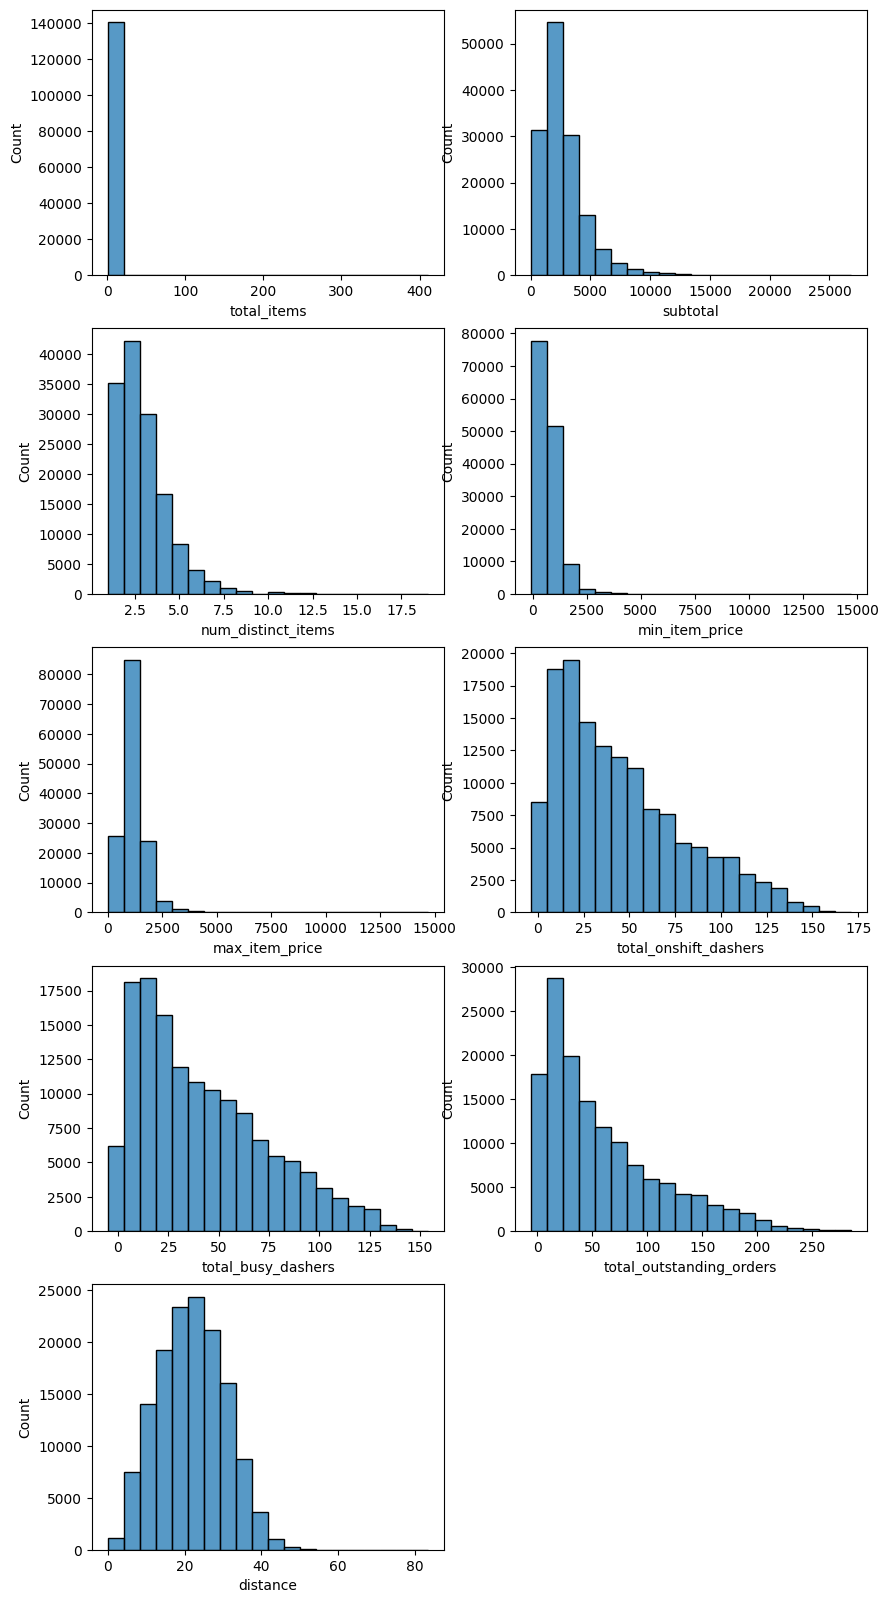

In [20]:
# Plot distributions for all numerical columns
plt.figure(figsize=(10, 20))
i = 1
for cols in numerical_columns:
    plt.subplot(5,2,i)
    sns.histplot(X_train[cols], bins=20)
    i += 1
plt.show()

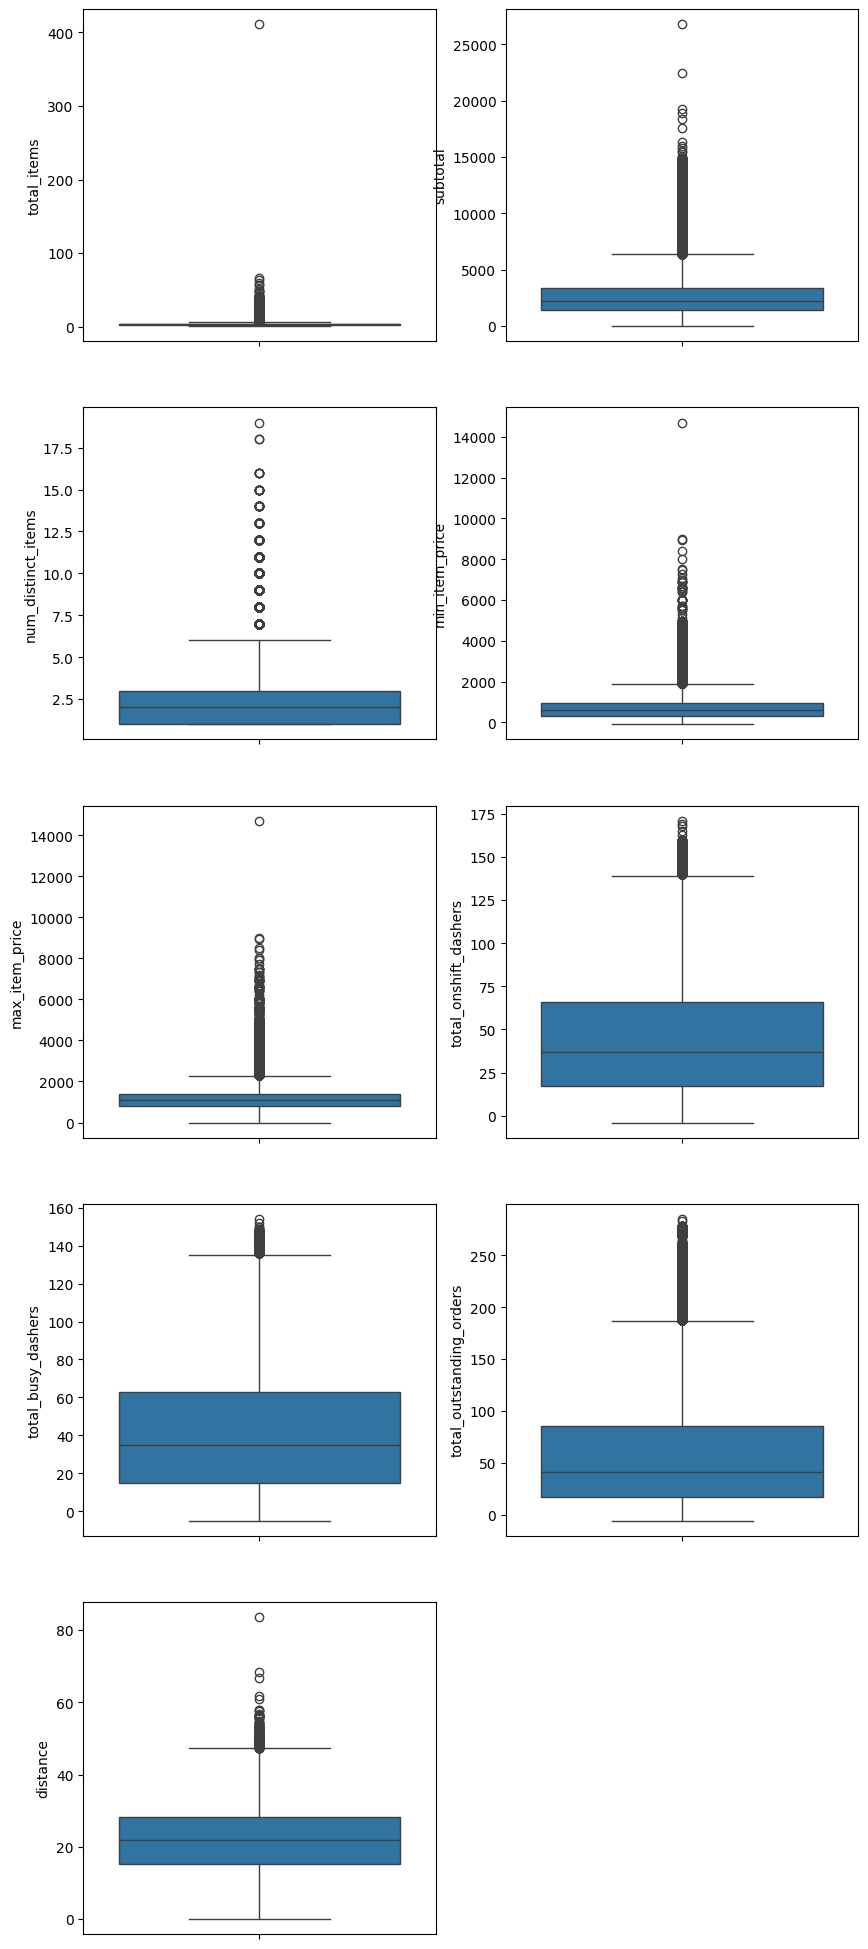

In [21]:
plt.figure(figsize=(10, 25))
i = 1
for cols in numerical_columns:
    plt.subplot(5,2,i)
    sns.boxplot(X_train[cols])
    i += 1
plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

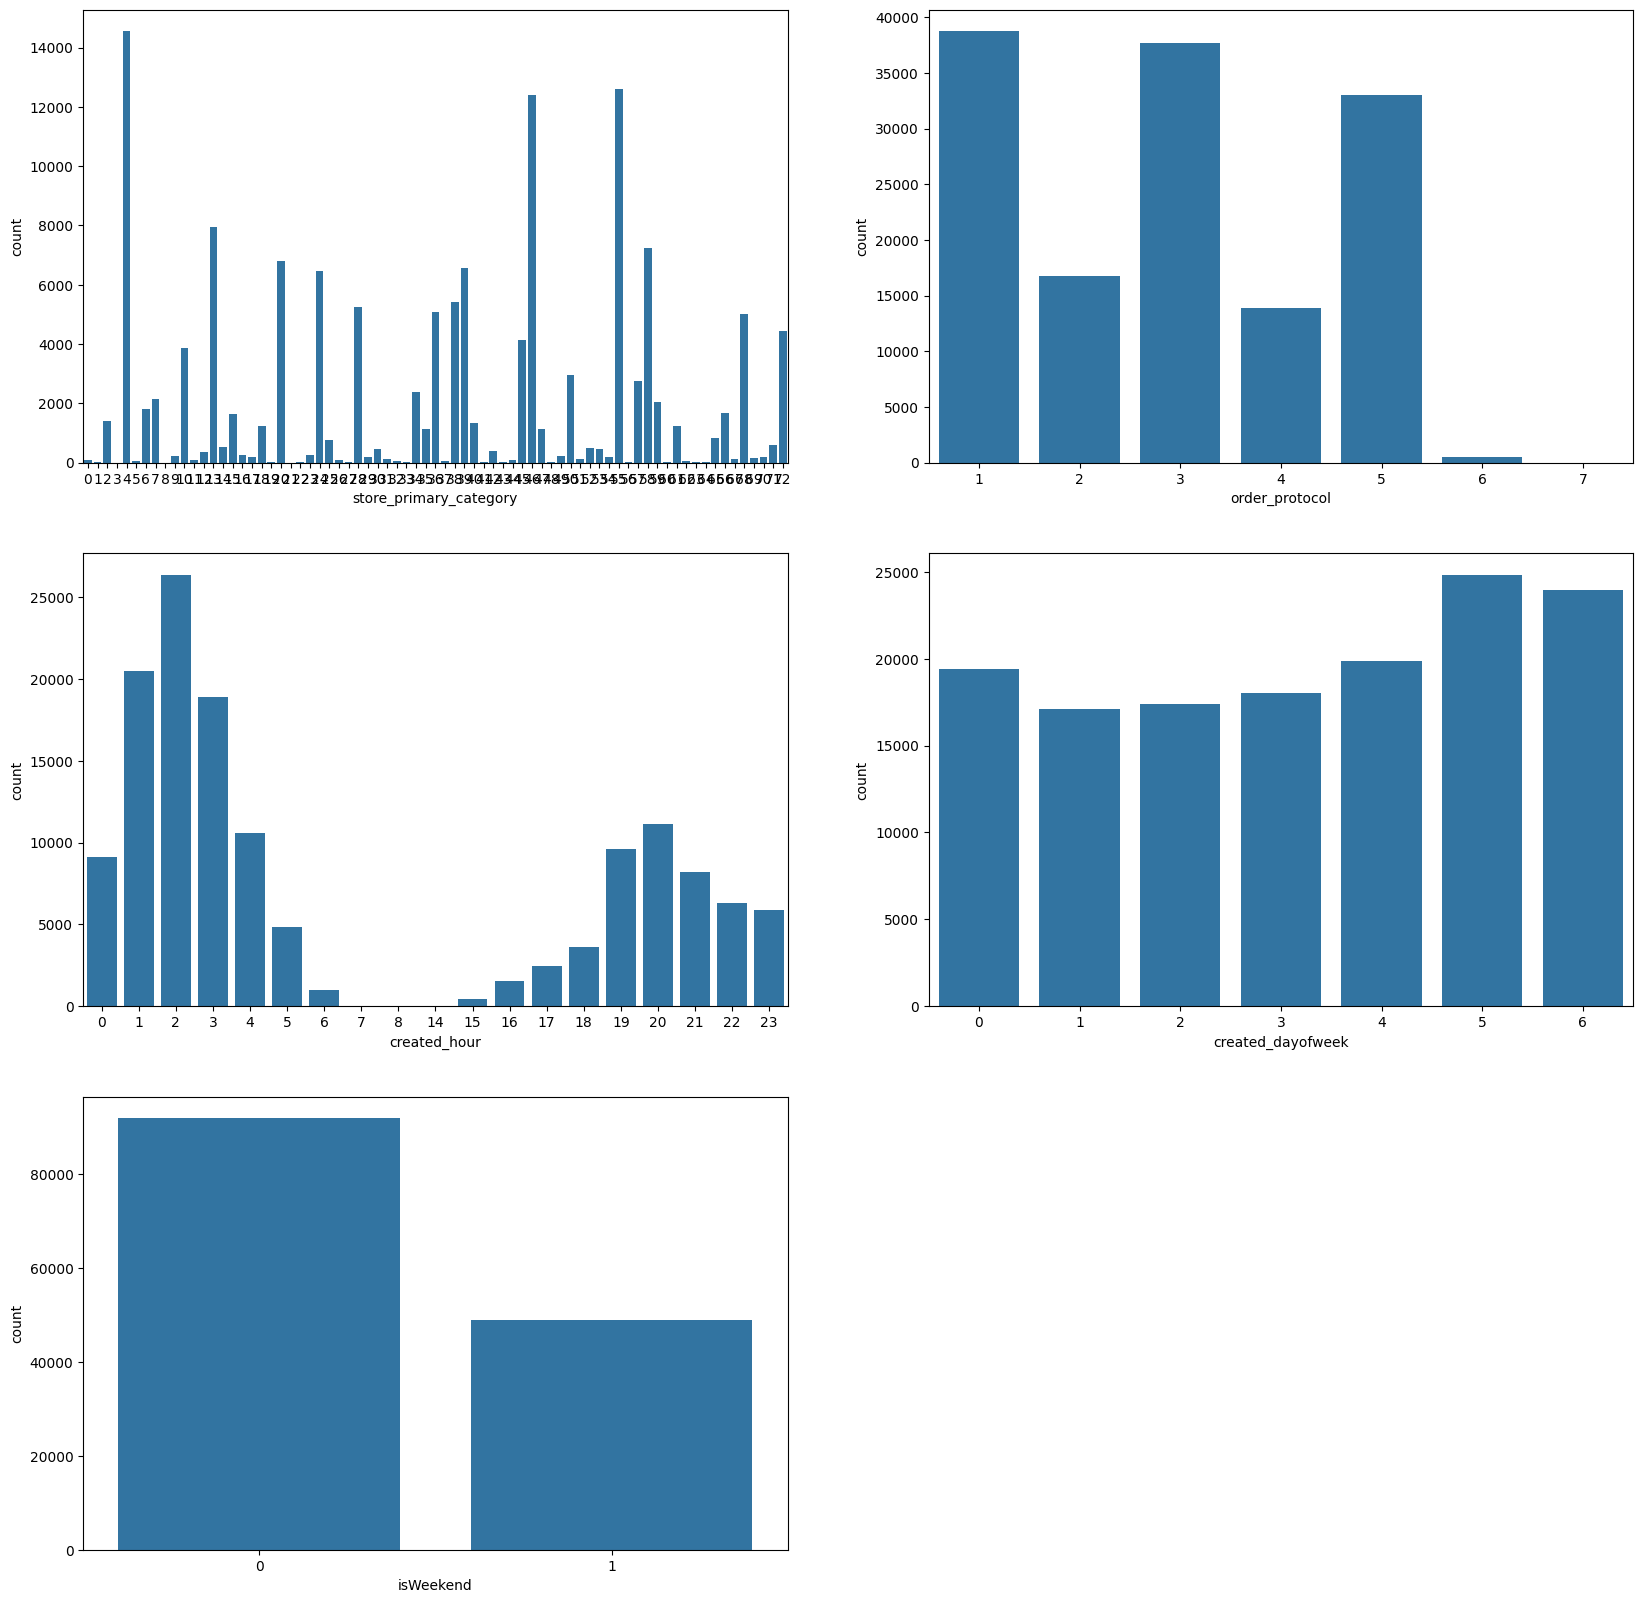

In [22]:
# Distribution of categorical columns
plt.figure(figsize=(20, 20))
i = 1
for cols in categorical_columns:
    plt.subplot(3,2,i)
    sns.countplot(x=X_train[cols])
    i += 1
plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

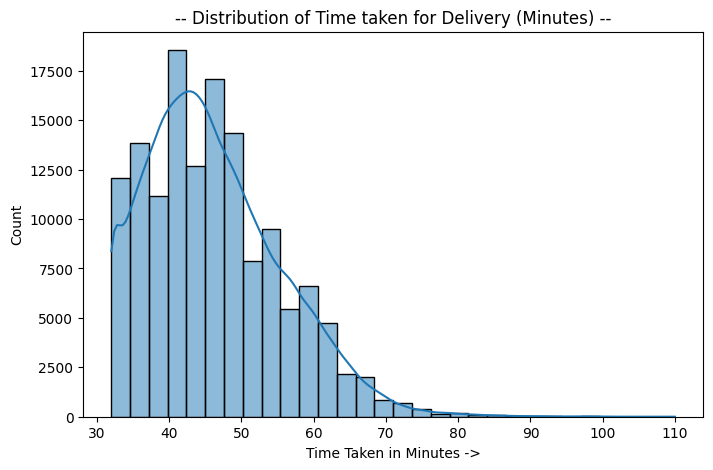

In [23]:
# Distribution of time_taken
plt.figure(figsize=(8, 5))
sns.histplot(y_train, bins=30, kde=True)
plt.title("-- Distribution of Time taken for Delivery (Minutes) --")
plt.xlabel("Time Taken in Minutes ->")
plt.show()


#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

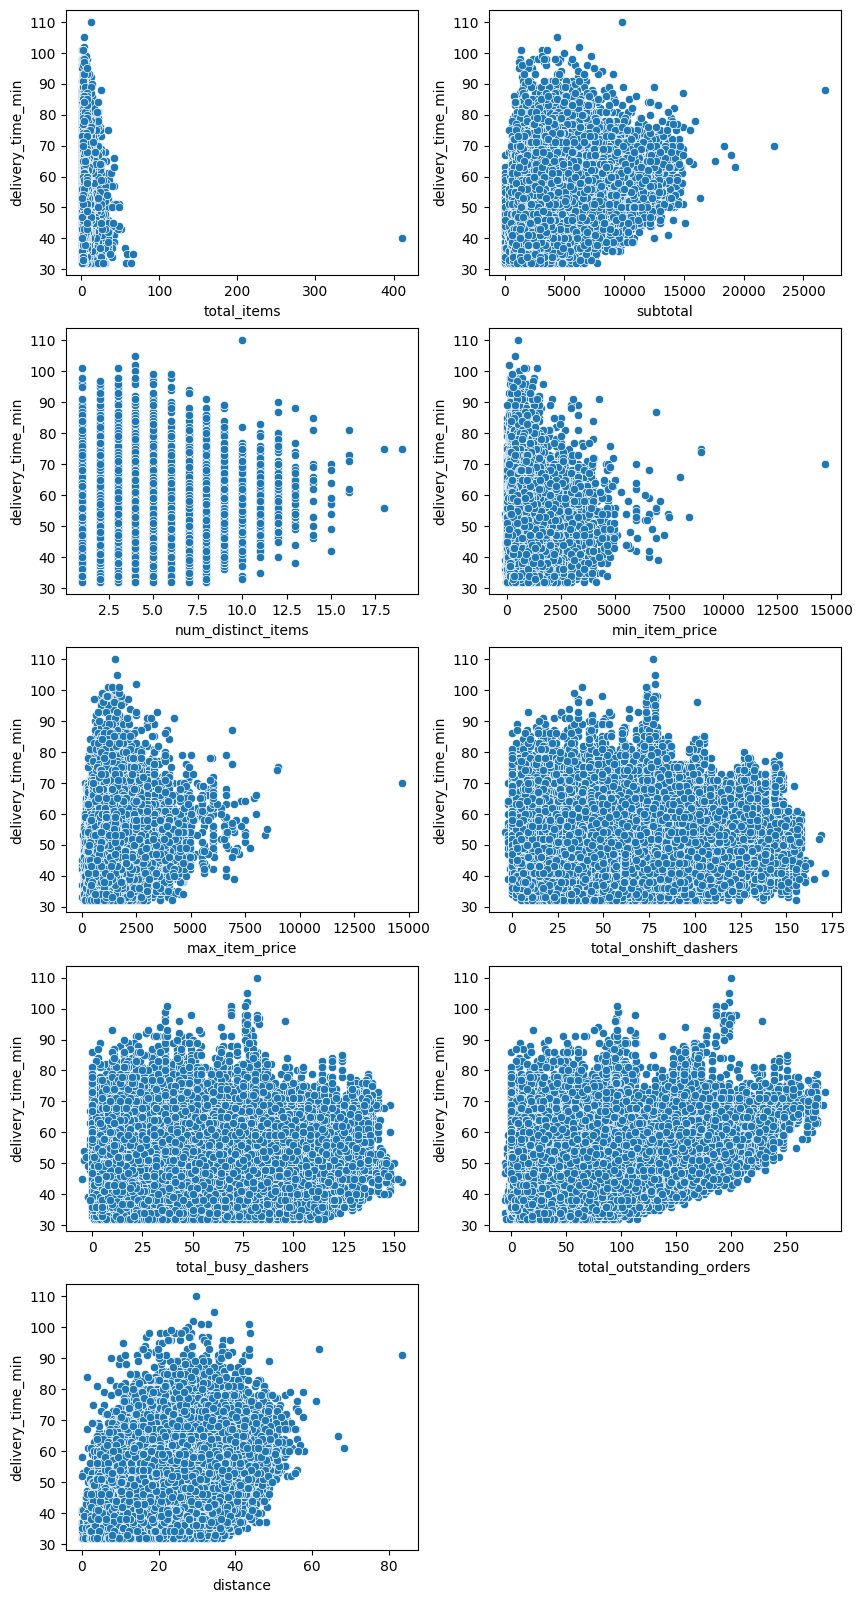

In [24]:
# Scatter plot to visualise the relationship between time_taken and other features  ( for numerical features)
plt.figure(figsize=(10, 20))
i = 1
for cols in numerical_columns:
    plt.subplot(5,2,i)
    sns.scatterplot(x=X_train[cols], y=y_train)
    i += 1
plt.show()

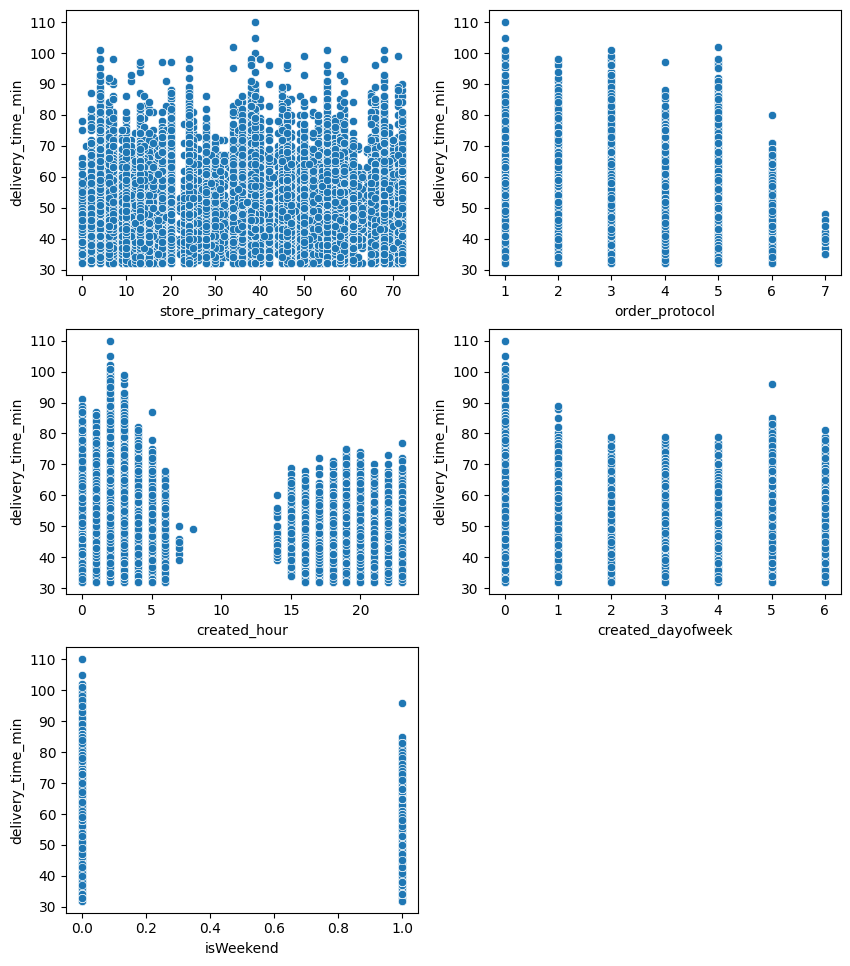

In [25]:
# Scatter plot to visualise the relationship between time_taken and other features  ( for categorical features)
plt.figure(figsize=(10, 20))
i = 1
for cols in categorical_columns:
    plt.subplot(5,2,i)
    sns.scatterplot(x=X_train[cols], y=y_train)
    i += 1
plt.show()

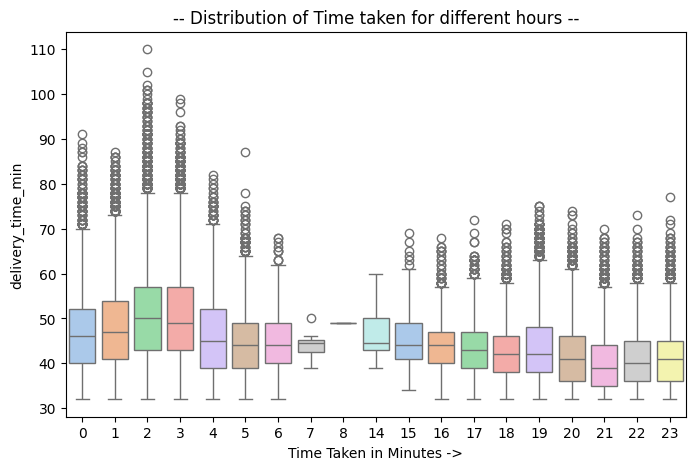

In [26]:
# Show the distribution of time_taken for different hours
plt.figure(figsize=(8, 5))
sns.boxplot(x=X_train['created_hour'], y=y_train, palette='pastel')
plt.title("-- Distribution of Time taken for different hours --")
plt.xlabel("Time Taken in Minutes ->")
plt.show()



#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

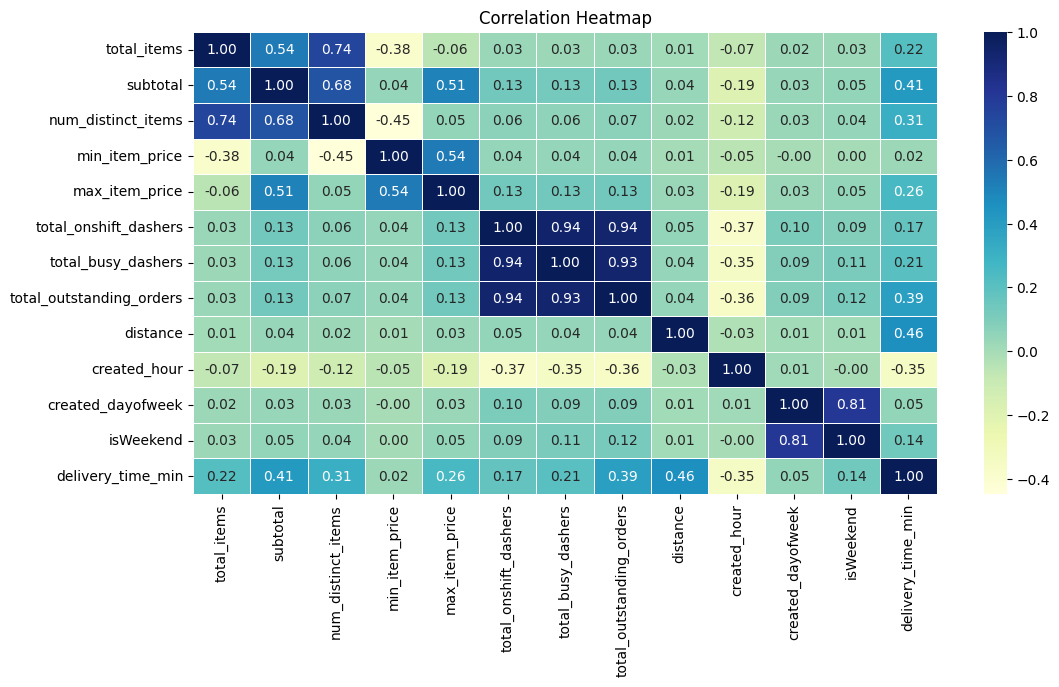

In [27]:
# Plot the heatmap of the correlation matrix
df_corr = X_train.copy()
df_corr['delivery_time_min'] = y_train

plt.figure(figsize=(12, 6))
sns.heatmap(df_corr.corr(numeric_only=True), annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [28]:
del df_corr

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [29]:
# Drop 3-5 weakly correlated columns from training dataset
X_train=X_train.drop(["min_item_price","total_onshift_dashers","created_dayofweek"],axis=1)
X_train.head()

store_primary_category order_protocol  total_items  subtotal  \
92179                      14              2            3      3600   
172804                     58              3            4      1458   
67246                      71              1            2      2590   
38049                      69              3            1      1050   
151202                      6              2            6      2875   

        num_distinct_items  max_item_price  total_busy_dashers  \
92179                    3            1400                39.0   
172804                   4             400                55.0   
67246                    1            1295                60.0   
38049                    1            1050                 3.0   
151202                   3             450                54.0   

        total_outstanding_orders  distance  created_hour  isWeekend  
92179                       70.0     30.12             3          0  
172804                      49.0     21.52            19          0  
67246                       69.0     18.68             3          0  
38049                        3.0     22.60            19          0  
151202                      64.0     29.64            21          0

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

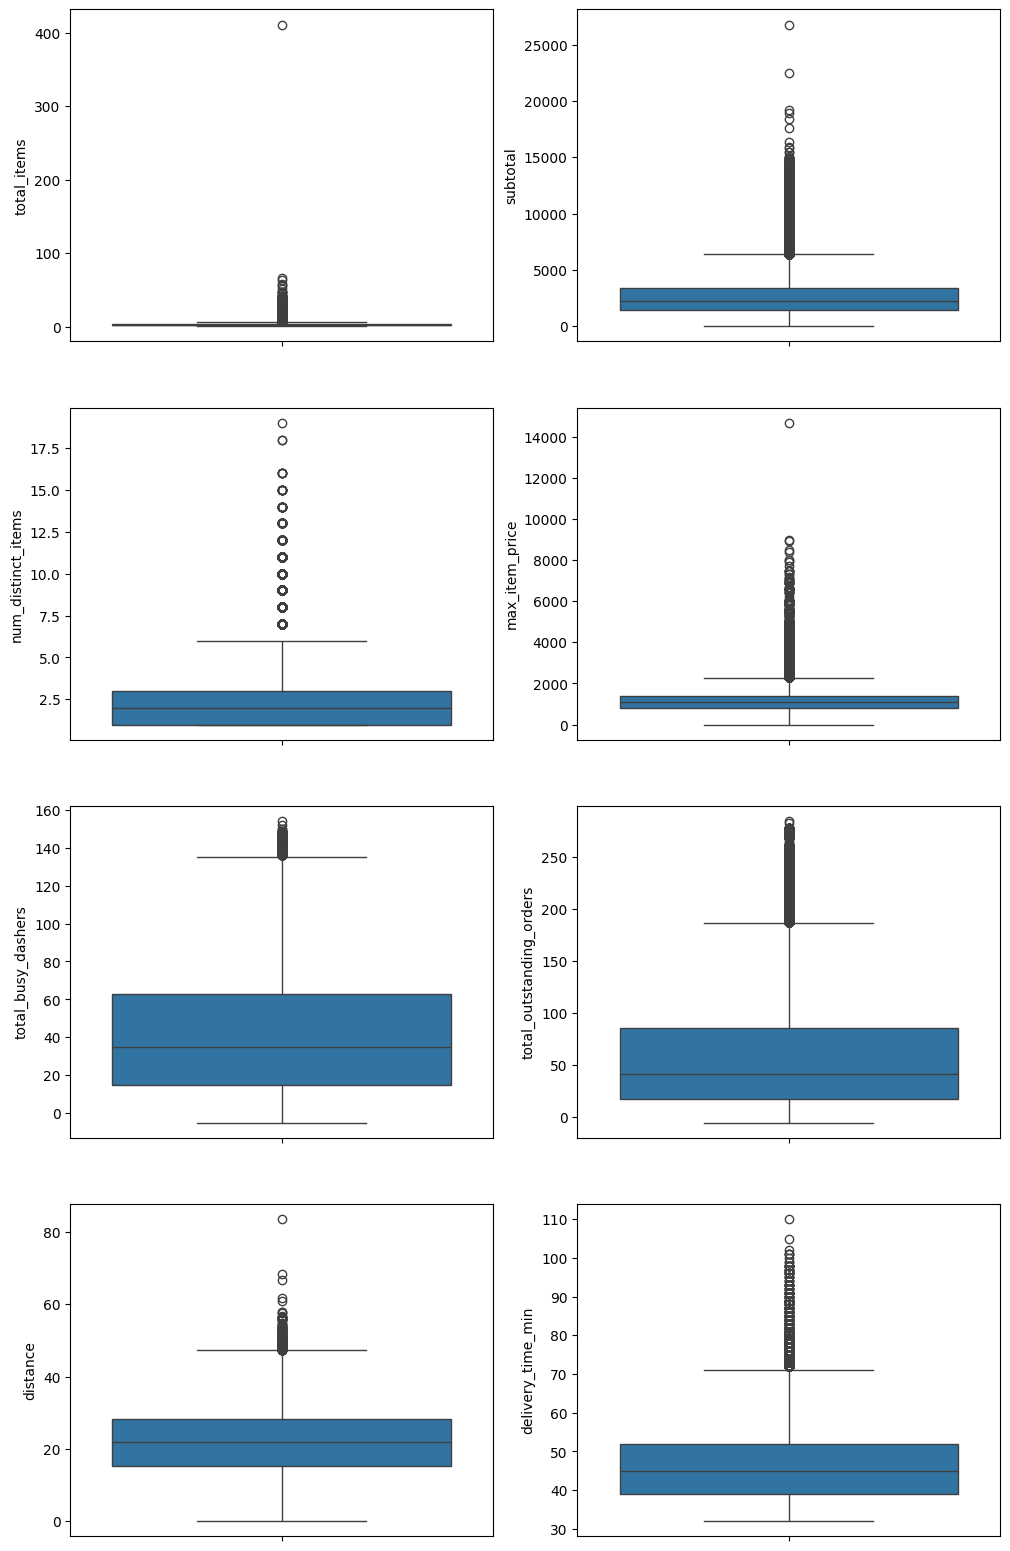

In [30]:
# Boxplot for time_taken
numerical_columns = ['total_items', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_busy_dashers', 'total_outstanding_orders', 'distance','delivery_time_min']
df_for_outlier = X_train.copy()
df_for_outlier['delivery_time_min'] = y_train

plt.figure(figsize=(12, 25))
i = 1
for cols in numerical_columns:
    plt.subplot(5,2,i)
    sns.boxplot(df_for_outlier[cols])
    i += 1
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [31]:
# Handle outliers
for cols in numerical_columns:
    Q1 = df_for_outlier[cols].quantile(0.25)
    Q3 = df_for_outlier[cols].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_for_outlier = df_for_outlier[(df_for_outlier[cols] >= lower_bound) & (df_for_outlier[cols] <= upper_bound)]


In [32]:
y_train = df_for_outlier['delivery_time_min']
X_train = df_for_outlier.drop(columns=['delivery_time_min'], axis=1)

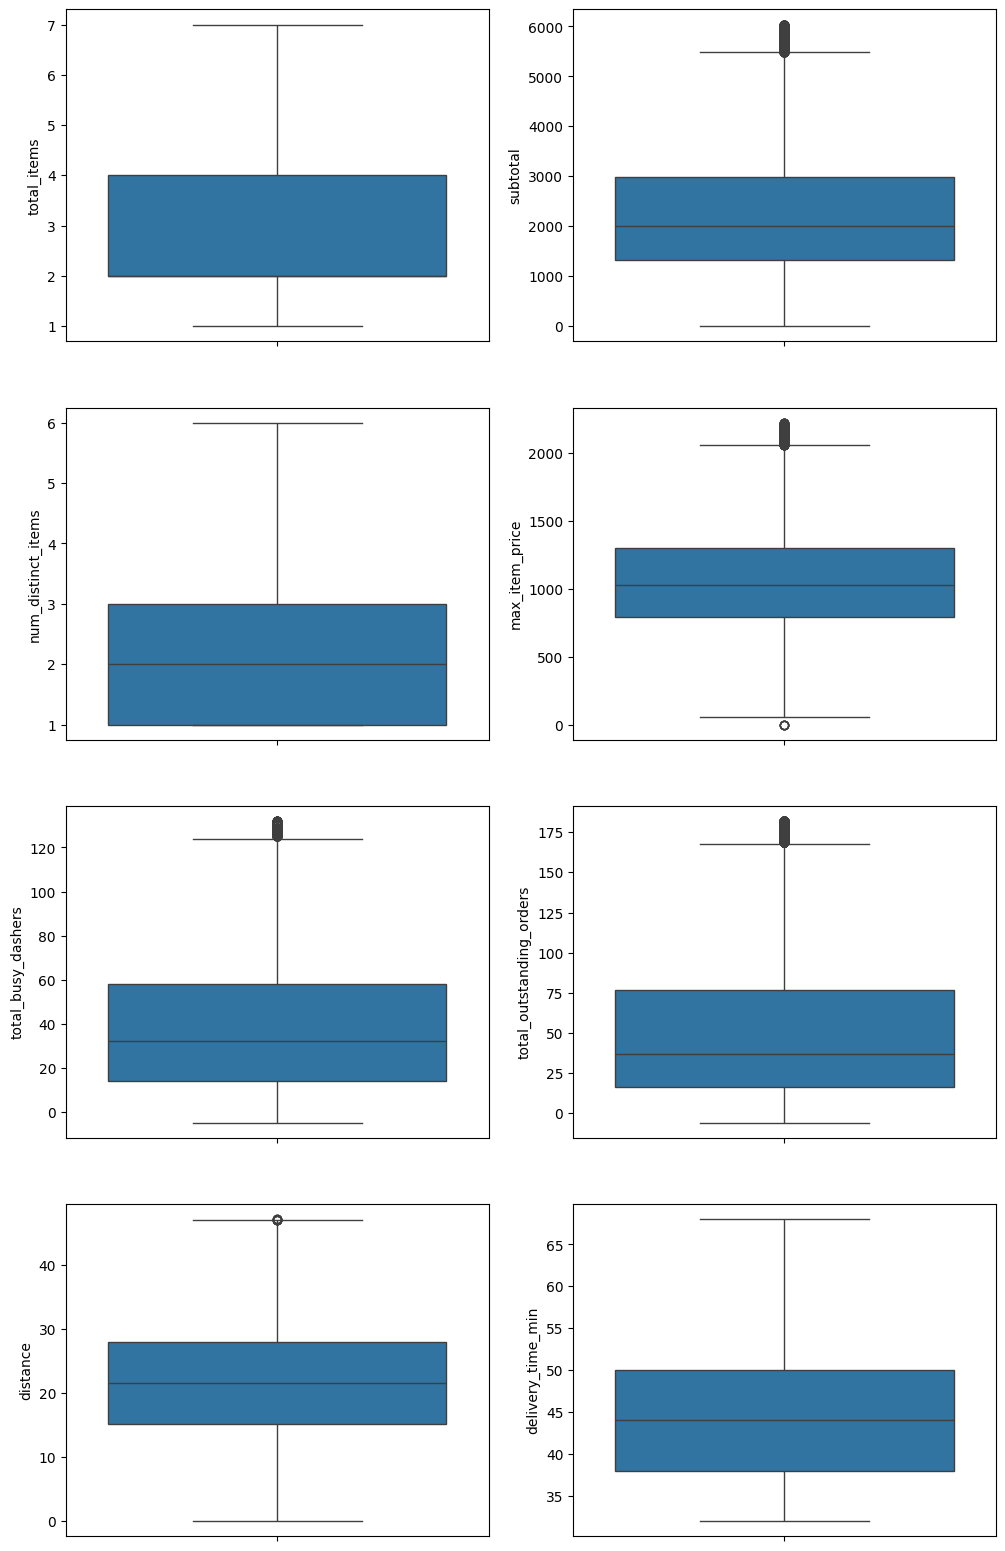

In [33]:
plt.figure(figsize=(12, 25))
i = 1
for cols in numerical_columns:
    plt.subplot(5,2,i)
    sns.boxplot(df_for_outlier[cols])
    i += 1
plt.show()

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [34]:
# Define numerical and categorical columns for easy EDA and data manipulation
numerical_columns = ['total_items', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_busy_dashers', 'total_outstanding_orders', 'distance','delivery_time_min']
categorical_columns =['store_primary_category', 'order_protocol',  'created_hour', 'created_dayofweek', 'isWeekend']
df_test=X_test.copy()
df_test['delivery_time_min'] =y_test

#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

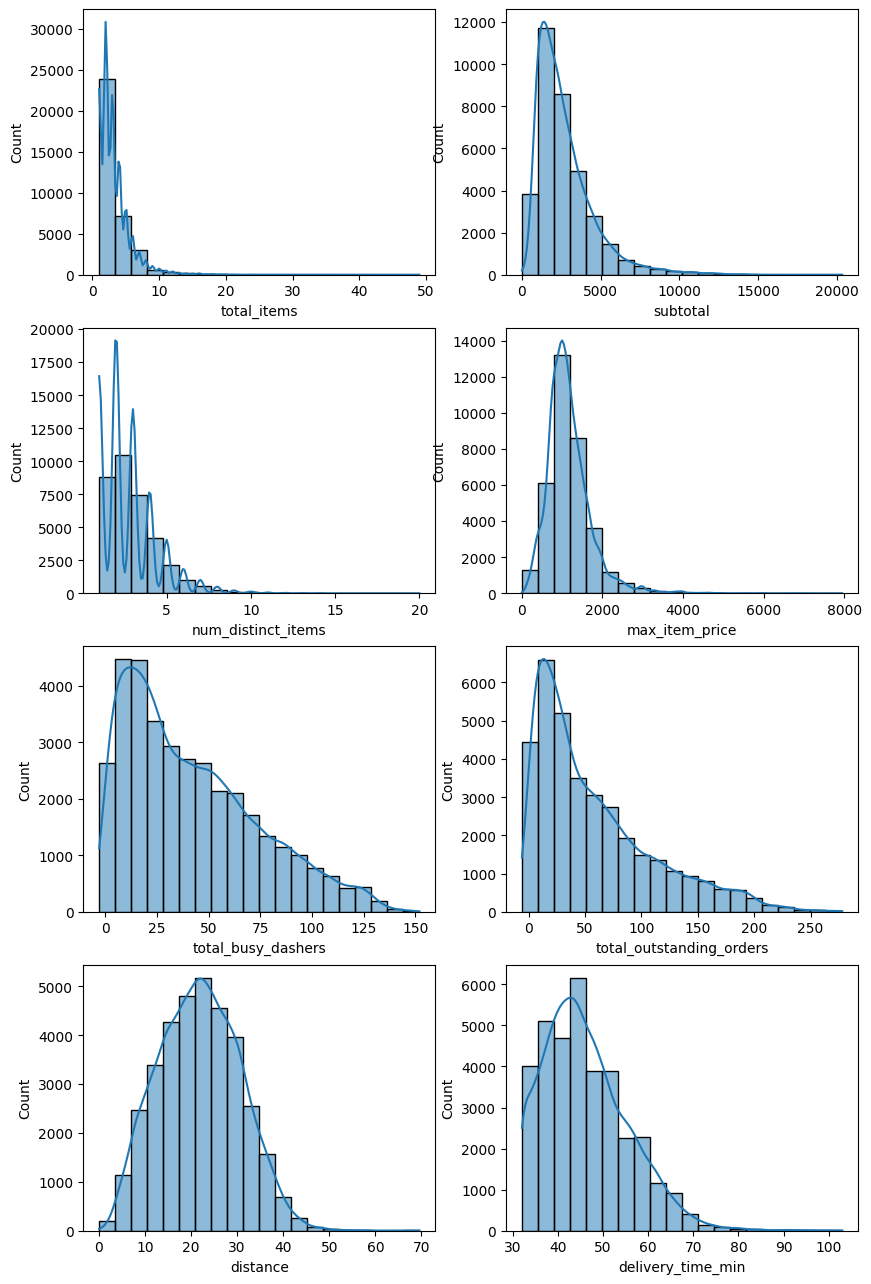

In [35]:
# Plot distributions for all numerical columns
plt.figure(figsize=(10, 20))
i = 1
for cols in numerical_columns:
    plt.subplot(5,2,i)
    sns.histplot(df_test[cols], bins=20, kde=True)
    i += 1
plt.show()


##### **4.1.2**
Check the distribution of categorical features

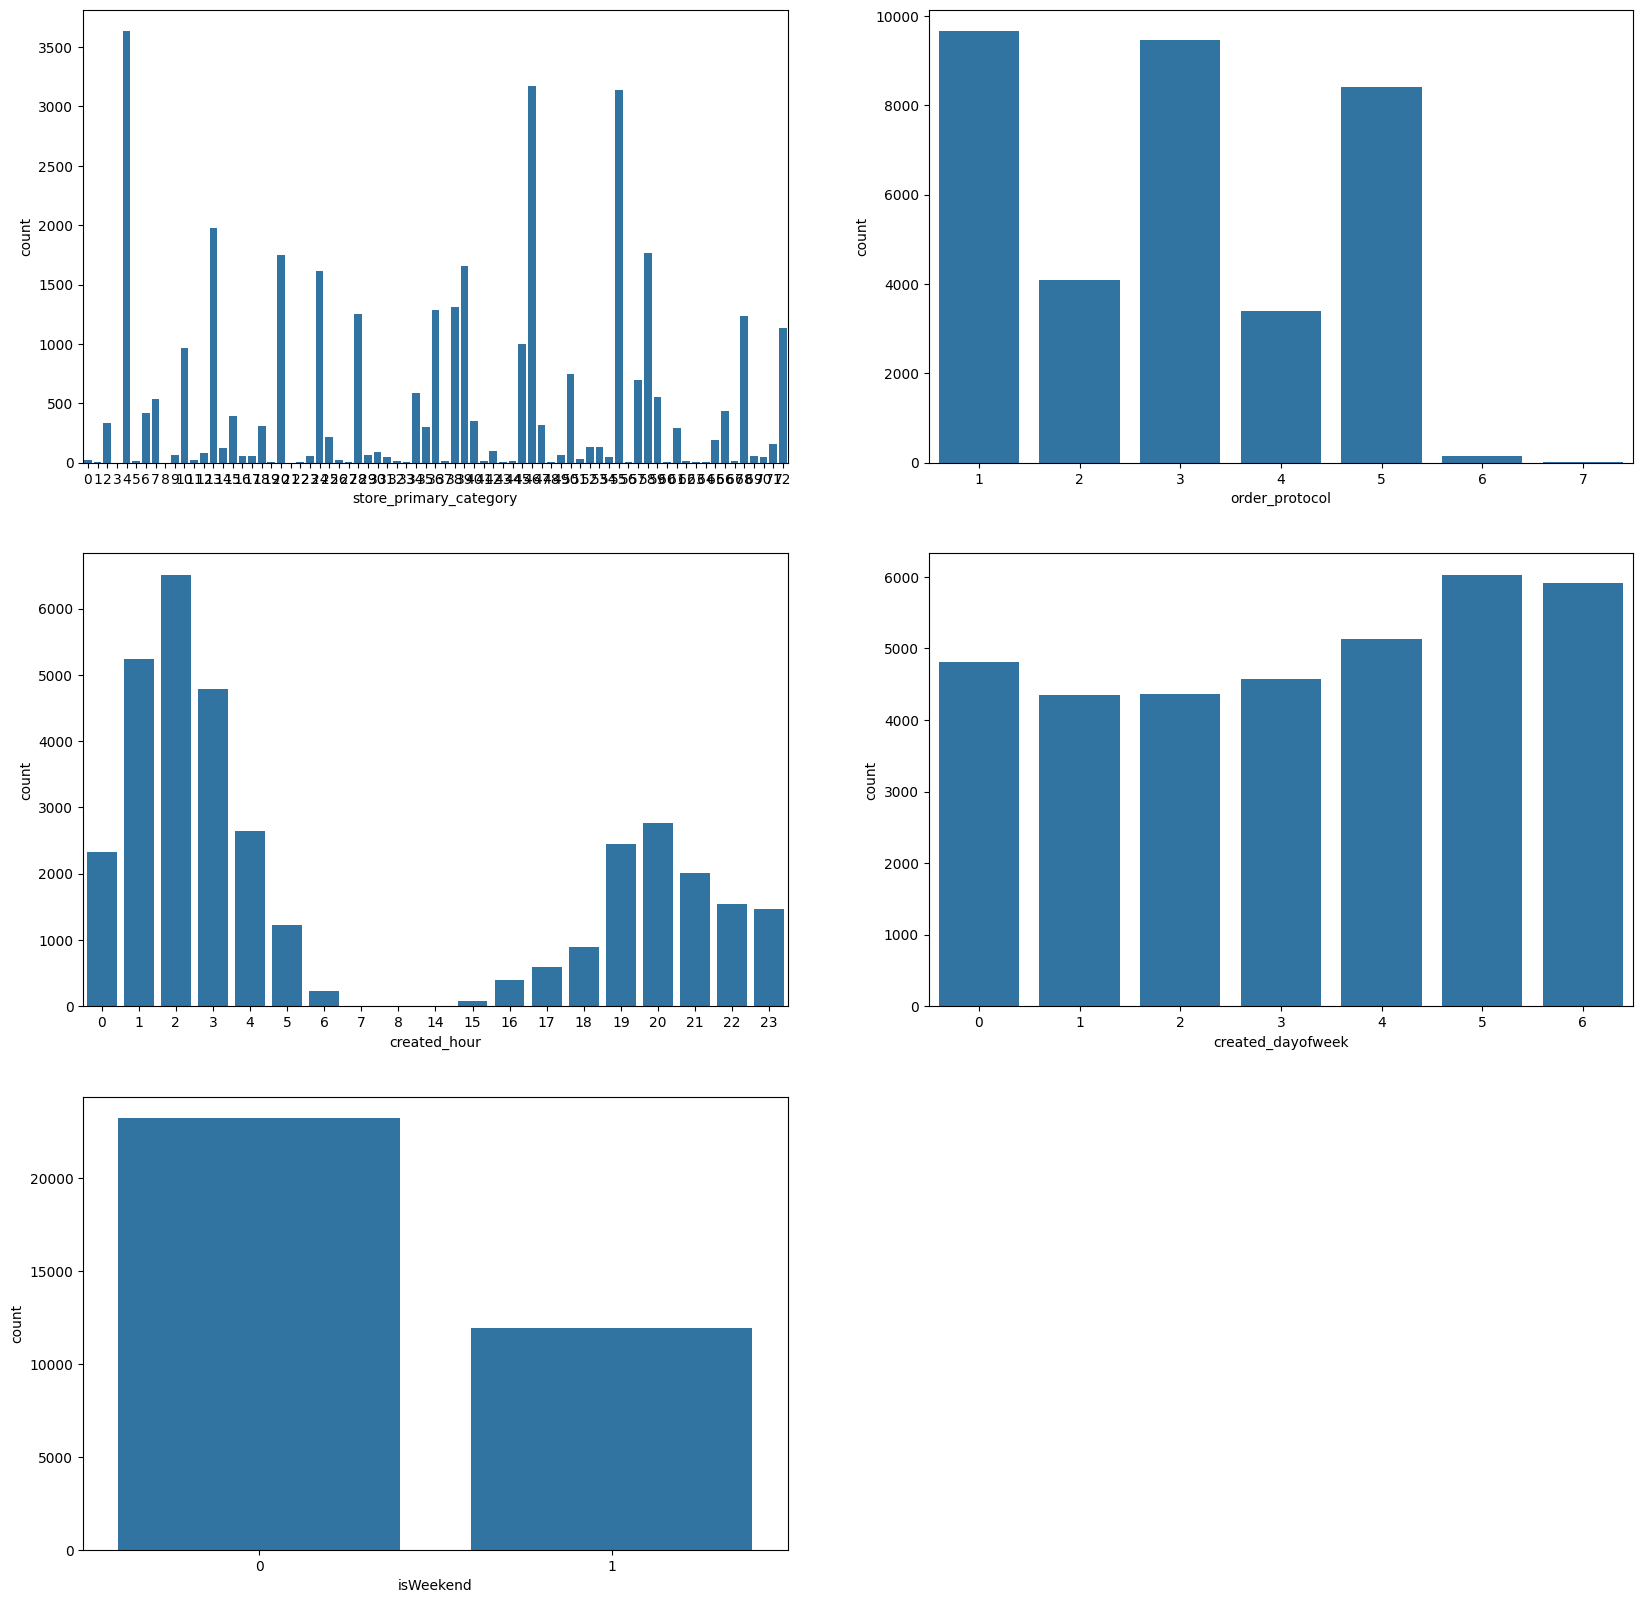

In [36]:
# Distribution of categorical columns
plt.figure(figsize=(20, 20))
i = 1
for cols in categorical_columns:
    plt.subplot(3,2,i)
    sns.countplot(x=df_test[cols])
    i += 1
plt.show()


##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

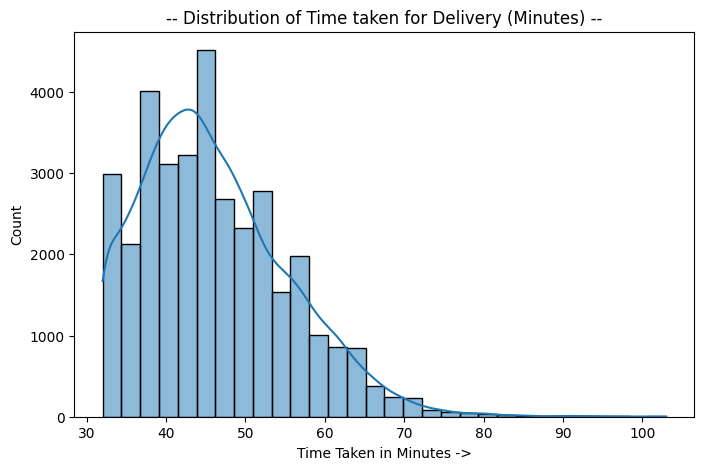

In [37]:
# Distribution of time_taken
plt.figure(figsize=(8, 5))
sns.histplot(y_test, bins=30, kde=True)
plt.title("-- Distribution of Time taken for Delivery (Minutes) --")
plt.xlabel("Time Taken in Minutes ->")
plt.show()


#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

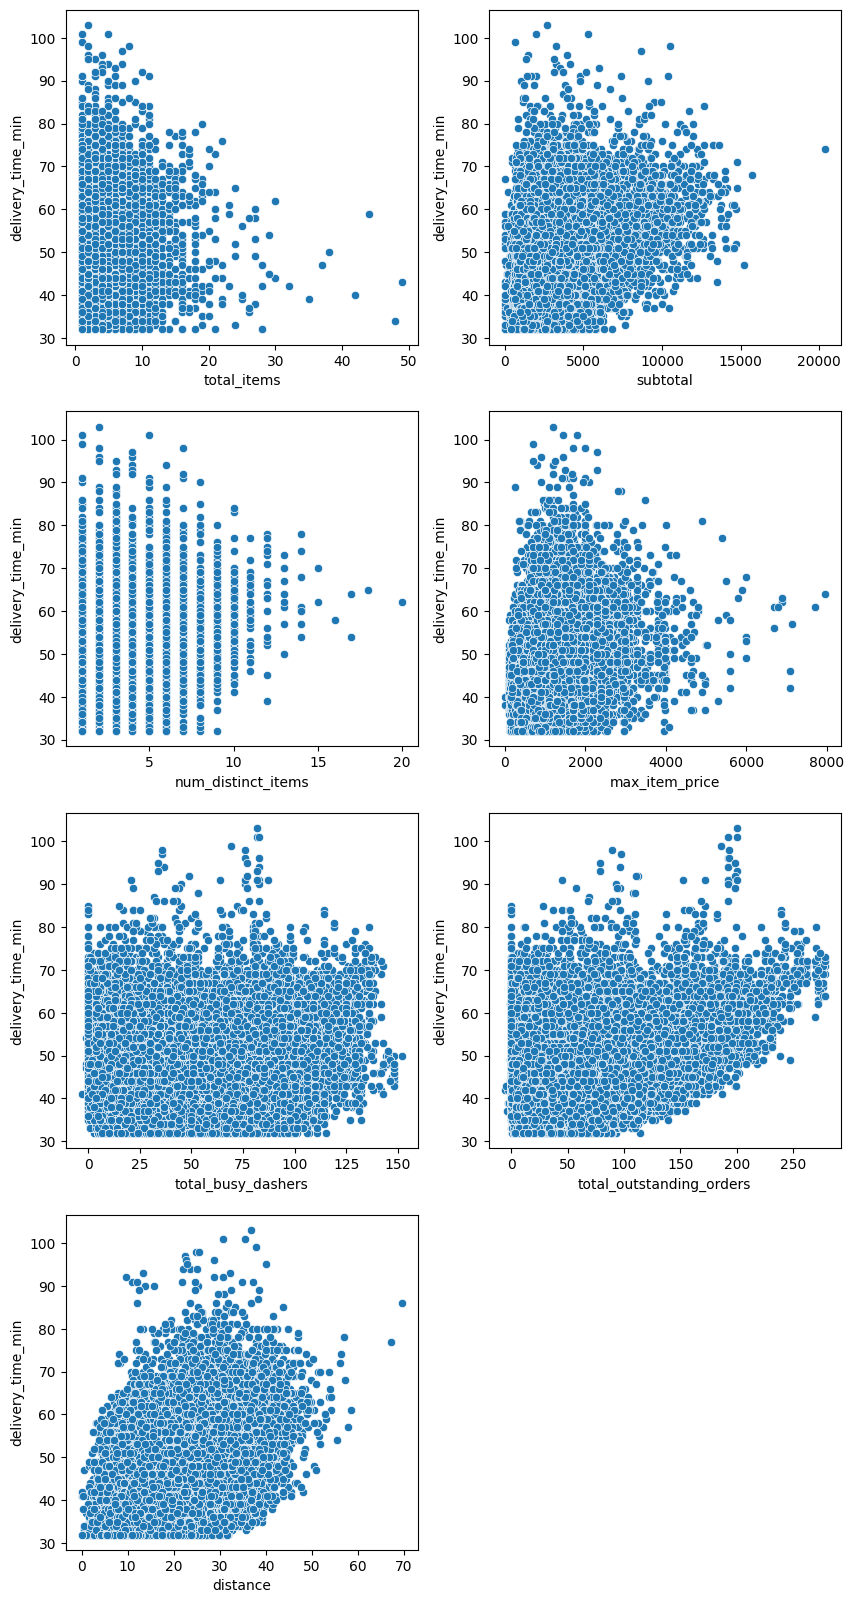

In [38]:
# Scatter plot to visualise the relationship between time_taken and other features
numerical_columns = ['total_items', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_busy_dashers', 'total_outstanding_orders', 'distance']
plt.figure(figsize=(10, 20))
i = 1
for cols in numerical_columns:
    plt.subplot(4,2,i)
    sns.scatterplot(x=df_test[cols], y=y_test)
    i += 1
plt.show()


#### **4.3** Drop the columns with weak correlations with the target variable

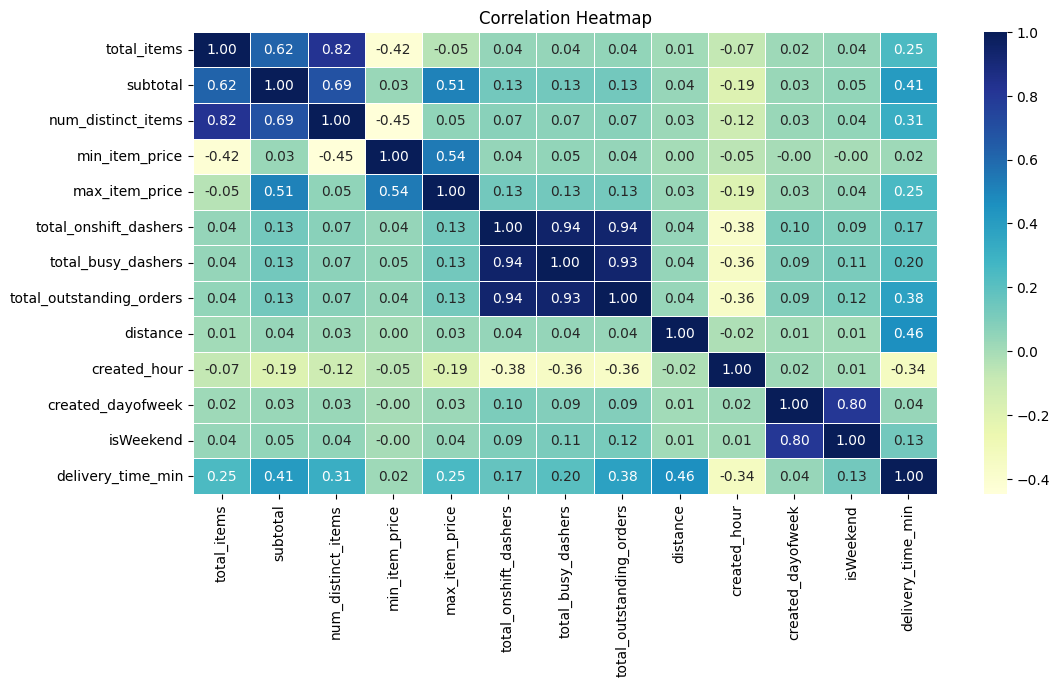

In [39]:
# Drop the weakly correlated columns from training dataset
plt.figure(figsize=(12, 6))
sns.heatmap(df_test.corr(numeric_only=True), annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [40]:
X_test=X_test.drop(["min_item_price","total_onshift_dashers","created_dayofweek"],axis=1)
X_test.head()

store_primary_category order_protocol  total_items  subtotal  \
11670                      50              5            2      2148   
55986                      25              3            3      2560   
92342                      55              5            1      3085   
102137                     65              1            2      2300   
140517                     24              5            3      1725   

        num_distinct_items  max_item_price  total_busy_dashers  \
11670                    2             999                40.0   
55986                    3            1400               104.0   
92342                    1            2335                 6.0   
102137                   2            1600                45.0   
140517                   1             575                97.0   

        total_outstanding_orders  distance  created_hour  isWeekend  
11670                       51.0     12.72            19          1  
55986                      167.0     15.88             1          1  
92342                        6.0     18.20             0          1  
102137                      60.0      6.12             2          0  
140517                     139.0     12.20             4          1

## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [41]:
# Import libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
import scipy.stats as stats

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [42]:
# Apply scaling to the numerical columns
numerical_variables = ['store_primary_category', 'order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 
                       'max_item_price', 'total_busy_dashers','total_outstanding_orders', 'distance', 'created_hour', 'isWeekend']
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_variables] = scaler.fit_transform(X_train_scaled[numerical_variables])
X_test_scaled[numerical_variables] = scaler.transform(X_test_scaled[numerical_variables])

In [43]:
X_train_scaled.shape, X_test_scaled.shape

((118817, 11), (35156, 11))

In [44]:
X_train_scaled.head()

store_primary_category  order_protocol  total_items  subtotal  \
92179                -1.043844       -0.598534     0.194393  1.108289   
172804                1.061934        0.059759     0.879485 -0.678290   
67246                 1.684096       -1.256827    -0.490699  0.265878   
38049                 1.588378        0.059759    -1.175791 -1.018591   
151202               -1.426713       -0.598534     2.249669  0.503588   

        num_distinct_items  max_item_price  total_busy_dashers  \
92179             0.497963        0.840186            0.014392   
172804            1.317330       -1.698974            0.563214   
67246            -1.140771        0.573574            0.734720   
38049            -1.140771       -0.048520           -1.220457   
151202            0.497963       -1.572016            0.528912   

        total_outstanding_orders  distance  created_hour  isWeekend  
92179                   0.411578  0.980805     -0.684528  -0.700961  
172804                 -0.058886 -0.015525      1.129168  -0.700961  
67246                   0.389175 -0.344545     -0.684528  -0.700961  
38049                  -1.089426  0.109596      1.129168  -0.700961  
151202                  0.277159  0.925196      1.355880  -0.700961

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [45]:
# Create/Initialise the model
X_train_sm = X_train_scaled.copy()  
X_test_sm = X_test_scaled.copy()  

# Add intercept
X_train_sm = sm.add_constant(X_train_sm)
X_test_sm = sm.add_constant(X_test_sm)

In [46]:
# Train the model using the training data
# Train model
model = sm.OLS(y_train, X_train_sm).fit()

# Print summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      delivery_time_min   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                 2.252e+04
Date:                Wed, 30 Apr 2025   Prob (F-statistic):               0.00
Time:                        00:45:59   Log-Likelihood:            -3.4928e+05
No. Observations:              118817   AIC:                         6.986e+05
Df Residuals:                  118805   BIC:                         6.987e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       44.5582      0.013   3356.561      0.000      44.532      44.584
store_primary_category       0.0706      0.013      5.272      0.000       0.044       0.097
order_protocol              -1.0995      0.014    -80.844      0.000      -1.126      -1.073
total_items                 -0.1333      0.033     -4.049      0.000      -0.198      -0.069
subtotal                     1.5528      0.026     59.345      0.000       1.502       1.604
num_distinct_items           0.6206      0.029     21.403      0.000       0.564       0.677
max_item_price               0.1744      0.020      8.560      0.000       0.134       0.214
total_busy_dashers          -9.5862      0.036   -268.471      0.000      -9.656      -9.516
total_outstanding_orders    10.2759      0.036    286.444      0.000      10.206      10.346
distance                     3.9409      0.013    296.366      0.000       3.915       3.967
created_hour                -1.6905      0.015   -116.565      0.000      -1.719      -1.662
isWeekend                    0.9075      0.013     68.037      0.000       0.881       0.934
==============================================================================
Omnibus:                     3998.606   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6729.756
Skew:                           0.299   Prob(JB):                         0.00
Kurtosis:                       4.000   Cond. No.                         6.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
# Make predictions
y_train_pred = model.predict(X_train_sm)
y_test_pred = model.predict(X_test_sm)

In [48]:
# Find results for evaluation metrics
print("R2 Score  Train  : ", np.round(r2_score(y_train, y_train_pred),4))
print("R2 Score  test   : ", np.round(r2_score(y_test, y_test_pred),4))


R2 Score  Train  :  0.6759
R2 Score  test   :  0.7157


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [49]:
# Loop through the number of features and test the model
X_train_ref = X_train_scaled.copy()  
X_test_ref = X_test_scaled.copy()


#### Iteration 1

In [50]:
model = LinearRegression()
# Initialize RFE to select the top n-1 columns
rfe = RFE(estimator=model, n_features_to_select=(X_train_ref.shape[1]-1))

In [51]:
rfe.fit_transform(X_train_ref, y_train)
list(zip(X_train_ref.columns, rfe.support_, rfe.ranking_))

[('store_primary_category', np.False_, np.int64(2)),
 ('order_protocol', np.True_, np.int64(1)),
 ('total_items', np.True_, np.int64(1)),
 ('subtotal', np.True_, np.int64(1)),
 ('num_distinct_items', np.True_, np.int64(1)),
 ('max_item_price', np.True_, np.int64(1)),
 ('total_busy_dashers', np.True_, np.int64(1)),
 ('total_outstanding_orders', np.True_, np.int64(1)),
 ('distance', np.True_, np.int64(1)),
 ('created_hour', np.True_, np.int64(1)),
 ('isWeekend', np.True_, np.int64(1))]

In [52]:
# Get selected features
selected_features = X_train_ref.columns[rfe.get_support()]

# Print the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['order_protocol', 'total_items', 'subtotal', 'num_distinct_items',
       'max_item_price', 'total_busy_dashers', 'total_outstanding_orders',
       'distance', 'created_hour', 'isWeekend'],
      dtype='object')


In [53]:
X_train_ref = X_train_ref[selected_features]
X_train_ref = X_train_ref[selected_features]

In [54]:
X_train_lm1 = sm.add_constant(X_train_ref)

In [55]:
lr2 = sm.OLS(y_train, X_train_lm1).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      delivery_time_min   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                 2.477e+04
Date:                Wed, 30 Apr 2025   Prob (F-statistic):               0.00
Time:                        00:46:00   Log-Likelihood:            -3.4930e+05
No. Observations:              118817   AIC:                         6.986e+05
Df Residuals:                  118806   BIC:                         6.987e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       44.5582      0.013   3356.183      0.000      44.532      44.584
order_protocol              -1.0939      0.014    -80.670      0.000      -1.120      -1.067
total_items                 -0.1380      0.033     -4.193      0.000      -0.203      -0.074
subtotal                     1.5610      0.026     59.752      0.000       1.510       1.612
num_distinct_items           0.6188      0.029     21.338      0.000       0.562       0.676
max_item_price               0.1718      0.020      8.434      0.000       0.132       0.212
total_busy_dashers          -9.5837      0.036   -268.395      0.000      -9.654      -9.514
total_outstanding_orders    10.2786      0.036    286.512      0.000      10.208      10.349
distance                     3.9406      0.013    296.315      0.000       3.915       3.967
created_hour                -1.6904      0.015   -116.544      0.000      -1.719      -1.662
isWeekend                    0.9058      0.013     67.923      0.000       0.880       0.932
==============================================================================
Omnibus:                     4023.279   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6768.317
Skew:                           0.301   Prob(JB):                         0.00
Kurtosis:                       4.002   Cond. No.                         6.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Iteration 2

In [56]:
model = LinearRegression()
# Initialize RFE to select the top n-1 columns
rfe = RFE(estimator=model, n_features_to_select=(X_train_ref.shape[1]-1))
rfe.fit_transform(X_train_ref, y_train)
list(zip(X_train_ref.columns, rfe.support_, rfe.ranking_))

[('order_protocol', np.True_, np.int64(1)),
 ('total_items', np.False_, np.int64(2)),
 ('subtotal', np.True_, np.int64(1)),
 ('num_distinct_items', np.True_, np.int64(1)),
 ('max_item_price', np.True_, np.int64(1)),
 ('total_busy_dashers', np.True_, np.int64(1)),
 ('total_outstanding_orders', np.True_, np.int64(1)),
 ('distance', np.True_, np.int64(1)),
 ('created_hour', np.True_, np.int64(1)),
 ('isWeekend', np.True_, np.int64(1))]

In [57]:
selected_features = X_train_ref.columns[rfe.get_support()]

# Print the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['order_protocol', 'subtotal', 'num_distinct_items', 'max_item_price',
       'total_busy_dashers', 'total_outstanding_orders', 'distance',
       'created_hour', 'isWeekend'],
      dtype='object')


In [58]:
X_train_ref = X_train_ref[selected_features]
X_train_ref = X_train_ref[selected_features]

In [59]:
X_train_lm2 = sm.add_constant(X_train_ref)
lr2 = sm.OLS(y_train, X_train_lm2).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      delivery_time_min   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                 2.752e+04
Date:                Wed, 30 Apr 2025   Prob (F-statistic):               0.00
Time:                        00:46:00   Log-Likelihood:            -3.4931e+05
No. Observations:              118817   AIC:                         6.986e+05
Df Residuals:                  118807   BIC:                         6.987e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       44.5582      0.013   3355.948      0.000      44.532      44.584
order_protocol              -1.0944      0.014    -80.703      0.000      -1.121      -1.068
subtotal                     1.5088      0.023     65.659      0.000       1.464       1.554
num_distinct_items           0.5277      0.019     27.460      0.000       0.490       0.565
max_item_price               0.2122      0.018     11.822      0.000       0.177       0.247
total_busy_dashers          -9.5836      0.036   -268.375      0.000      -9.654      -9.514
total_outstanding_orders    10.2790      0.036    286.505      0.000      10.209      10.349
distance                     3.9408      0.013    296.311      0.000       3.915       3.967
created_hour                -1.6901      0.015   -116.515      0.000      -1.718      -1.662
isWeekend                    0.9055      0.013     67.900      0.000       0.879       0.932
==============================================================================
Omnibus:                     4029.431   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6779.892
Skew:                           0.302   Prob(JB):                         0.00
Kurtosis:                       4.003   Cond. No.                         5.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Iteration 3

In [60]:
model = LinearRegression()
# Initialize RFE to select the top n-1 columns
rfe = RFE(estimator=model, n_features_to_select=(X_train_ref.shape[1]-1))
rfe.fit_transform(X_train_ref, y_train)
list(zip(X_train_ref.columns, rfe.support_, rfe.ranking_))

[('order_protocol', np.True_, np.int64(1)),
 ('subtotal', np.True_, np.int64(1)),
 ('num_distinct_items', np.True_, np.int64(1)),
 ('max_item_price', np.False_, np.int64(2)),
 ('total_busy_dashers', np.True_, np.int64(1)),
 ('total_outstanding_orders', np.True_, np.int64(1)),
 ('distance', np.True_, np.int64(1)),
 ('created_hour', np.True_, np.int64(1)),
 ('isWeekend', np.True_, np.int64(1))]

In [61]:
selected_features = X_train_ref.columns[rfe.get_support()]

# Print the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['order_protocol', 'subtotal', 'num_distinct_items',
       'total_busy_dashers', 'total_outstanding_orders', 'distance',
       'created_hour', 'isWeekend'],
      dtype='object')


In [62]:
X_train_ref = X_train_ref[selected_features]
X_train_ref = X_train_ref[selected_features]

In [63]:
X_train_lm2 = sm.add_constant(X_train_ref)
lr2 = sm.OLS(y_train, X_train_lm2).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      delivery_time_min   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                 3.090e+04
Date:                Wed, 30 Apr 2025   Prob (F-statistic):               0.00
Time:                        00:46:00   Log-Likelihood:            -3.4938e+05
No. Observations:              118817   AIC:                         6.988e+05
Df Residuals:                  118808   BIC:                         6.989e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       44.5582      0.013   3353.991      0.000      44.532      44.584
order_protocol              -1.1069      0.014    -81.827      0.000      -1.133      -1.080
subtotal                     1.6847      0.018     96.136      0.000       1.650       1.719
num_distinct_items           0.4249      0.017     24.780      0.000       0.391       0.459
total_busy_dashers          -9.5763      0.036   -268.053      0.000      -9.646      -9.506
total_outstanding_orders    10.2818      0.036    286.422      0.000      10.211      10.352
distance                     3.9411      0.013    296.161      0.000       3.915       3.967
created_hour                -1.7030      0.014   -117.674      0.000      -1.731      -1.675
isWeekend                    0.9071      0.013     67.982      0.000       0.881       0.933
==============================================================================
Omnibus:                     4036.632   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6773.352
Skew:                           0.303   Prob(JB):                         0.00
Kurtosis:                       4.001   Cond. No.                         5.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Iteration 4

In [64]:
model = LinearRegression()
# Initialize RFE to select the top n-1 columns
rfe = RFE(estimator=model, n_features_to_select=(X_train_ref.shape[1]-1))
rfe.fit_transform(X_train_ref, y_train)
list(zip(X_train_ref.columns, rfe.support_, rfe.ranking_))

[('order_protocol', np.True_, np.int64(1)),
 ('subtotal', np.True_, np.int64(1)),
 ('num_distinct_items', np.False_, np.int64(2)),
 ('total_busy_dashers', np.True_, np.int64(1)),
 ('total_outstanding_orders', np.True_, np.int64(1)),
 ('distance', np.True_, np.int64(1)),
 ('created_hour', np.True_, np.int64(1)),
 ('isWeekend', np.True_, np.int64(1))]

In [65]:
selected_features = X_train_ref.columns[rfe.get_support()]

# Print the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['order_protocol', 'subtotal', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'created_hour', 'isWeekend'],
      dtype='object')


In [66]:
X_train_ref = X_train_ref[selected_features]
X_train_ref = X_train_ref[selected_features]

In [67]:
X_train_lm2 = sm.add_constant(X_train_ref)
lr2 = sm.OLS(y_train, X_train_lm2).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      delivery_time_min   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                 3.505e+04
Date:                Wed, 30 Apr 2025   Prob (F-statistic):               0.00
Time:                        00:46:00   Log-Likelihood:            -3.4968e+05
No. Observations:              118817   AIC:                         6.994e+05
Df Residuals:                  118809   BIC:                         6.995e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       44.5582      0.013   3345.371      0.000      44.532      44.584
order_protocol              -1.1049      0.014    -81.468      0.000      -1.131      -1.078
subtotal                     1.9545      0.014    141.947      0.000       1.927       1.981
total_busy_dashers          -9.5925      0.036   -267.862      0.000      -9.663      -9.522
total_outstanding_orders    10.2830      0.036    285.721      0.000      10.212      10.354
distance                     3.9421      0.013    295.481      0.000       3.916       3.968
created_hour                -1.7030      0.015   -117.368      0.000      -1.731      -1.675
isWeekend                    0.9157      0.013     68.473      0.000       0.889       0.942
==============================================================================
Omnibus:                     3919.022   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6457.191
Skew:                           0.301   Prob(JB):                         0.00
Kurtosis:                       3.971   Cond. No.                         5.57
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Final model with selected features

In [68]:
# Build the final model with selected number of features
selected_features =['order_protocol', 'subtotal', 'total_busy_dashers','total_outstanding_orders', 'distance', 'created_hour', 'isWeekend']
X_train_final = X_train_scaled[selected_features].copy() 
X_test_final = X_test_scaled[selected_features].copy() 
y_train_final = y_train.copy()
y_test_final  = y_test.copy()

X_train_final = sm.add_constant(X_train_final)
X_test_final = sm.add_constant(X_test_final)

lr_final = sm.OLS(y_train, X_train_final).fit()
lr_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      delivery_time_min   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                 3.505e+04
Date:                Wed, 30 Apr 2025   Prob (F-statistic):               0.00
Time:                        00:46:00   Log-Likelihood:            -3.4968e+05
No. Observations:              118817   AIC:                         6.994e+05
Df Residuals:                  118809   BIC:                         6.995e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       44.5582      0.013   3345.371      0.000      44.532      44.584
order_protocol              -1.1049      0.014    -81.468      0.000      -1.131      -1.078
subtotal                     1.9545      0.014    141.947      0.000       1.927       1.981
total_busy_dashers          -9.5925      0.036   -267.862      0.000      -9.663      -9.522
total_outstanding_orders    10.2830      0.036    285.721      0.000      10.212      10.354
distance                     3.9421      0.013    295.481      0.000       3.916       3.968
created_hour                -1.7030      0.015   -117.368      0.000      -1.731      -1.675
isWeekend                    0.9157      0.013     68.473      0.000       0.889       0.942
==============================================================================
Omnibus:                     3919.022   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6457.191
Skew:                           0.301   Prob(JB):                         0.00
Kurtosis:                       3.971   Cond. No.                         5.57
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Final result eveluation metrics

In [69]:
#evaluation metrics
y_train_pred_final = lr_final.predict(X_train_final)
y_test_pred_final = lr_final.predict(X_test_final)

print("R2 Score  Train  : ", np.round(r2_score(y_train, y_train_pred_final),4))
print("R2 Score  test   : ", np.round(r2_score(y_test, y_test_pred_final),4))

mae = mean_absolute_error(y_test, y_test_pred_final)
mse = mean_squared_error(y_test, y_test_pred_final)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE): ", round(mae,4))
print("Mean Squared Error (MSE): ", round(mse,4))
print("Root Mean Squared Error (RMSE): ", round(rmse,4))


R2 Score  Train  :  0.6737
R2 Score  test   :  0.7133
Mean Absolute Error (MAE):  3.6695
Mean Squared Error (MSE):  24.8738
Root Mean Squared Error (RMSE):  4.9874


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

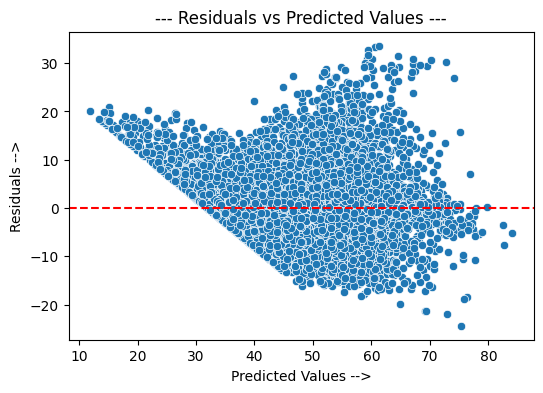

In [70]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
residuals = y_test - y_test_pred_final
#residuals vs predicted values
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test_pred_final, y=residuals)
plt.axhline(y=0, color='red',  linestyle='--')
plt.xlabel("Predicted Values -->")
plt.ylabel("Residuals -->")
plt.title("--- Residuals vs Predicted Values ---")
plt.show()


#### Q-Q Plot

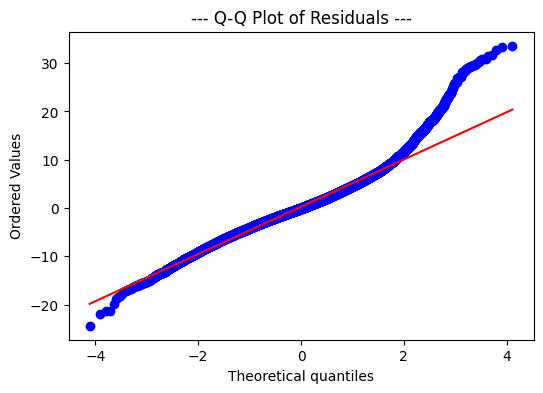

In [71]:
import scipy.stats as stats
plt.figure(figsize=(6,4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("--- Q-Q Plot of Residuals ---")
plt.show()

#### Histogram for residuals

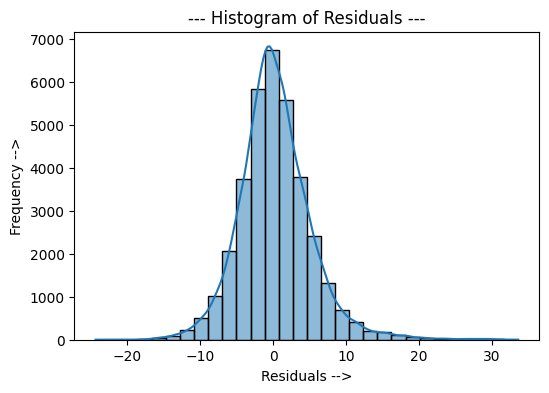

In [72]:
plt.figure(figsize=(6,4))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residuals -->")
plt.ylabel("Frequency -->")
plt.title("--- Histogram of Residuals ---")
plt.show()

[Your inferences here:]
> 1. Residuals vs. Predicted Values:
>     - Residuals are randomly scattered around zero with no clear pattern.
> 2. Q-Q Plot
>     - Residuals are following almost a straight diagonal line. This indicate that this is a good model.
> 3. Histogram of Residuals :
>    - Residuals are following a normal (bell-shaped) distributio.  This indicate that this is a good fit model.


#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [73]:
# Compare the scaled vs unscaled features used in the final model
# Train the model using the unsclaed training data
X_train_unscale = X_train[selected_features].copy()
X_train_unscale = sm.add_constant(X_train_unscale)
lr_unscale = sm.OLS(y_train, X_train_unscale).fit()
unscaled_coef = lr_unscale.params
unscaled_coef = unscaled_coef.drop('const')

scaled_coef = lr_final.params
scaled_coef = scaled_coef.drop('const')
final_features = selected_features

# Create dataframe
coef_df = pd.DataFrame({"Feature": final_features, "Scaled_Coef": scaled_coef, 'Unscaled_coef':unscaled_coef})

coef_df


Feature  Scaled_Coef  Unscaled_coef
order_protocol                      order_protocol    -1.104873      -0.727330
subtotal                                  subtotal     1.954460       0.001630
total_busy_dashers              total_busy_dashers    -9.592472      -0.329035
total_outstanding_orders  total_outstanding_orders    10.283023       0.230371
distance                                  distance     3.942144       0.456706
created_hour                          created_hour    -1.702954      -0.193040
isWeekend                                isWeekend     0.915704       1.948228

Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [74]:
# Analyze the effect of a unit change in a feature, say 'total_outstanding_orders'
unit_change = 1  

# Get the coefficient for 'total_outstanding_orders'
coef_total_outstanding_orders = coef_df.loc[coef_df["Feature"] == "total_outstanding_orders", "Scaled_Coef"].values[0]

impact_on_time_taken = round(unit_change * coef_total_outstanding_orders, 2)

print("Impact of unit change in Total outstanding order is :", impact_on_time_taken)


Impact of unit change in Total outstanding order is : 10.28


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
> Yes there are three categorical Variables in the data.
> <br>**market_id** - This variable has a very weak relationship with delivery time.
> <br>**store_primary_category** - This is restaurant type. Restaurant type does not have any effect on delivery time.
> <br>**order_protocol** - Protocol 6 and 7 haas faster delivery time

> Additionally there is a derived categorical variable.
> <br>**isWeekend** - Orders placed on weekends might take longer time due to higher demand, restaurant workload or traffic congestion.



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
> test_size = 0.2 means 80% of the data wwill be used to train the model and 20% of the data will be used to test the model.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
> Looking at the heatmap, **'Distance'** haas the highest correlation with the target variable ( delivery time)



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

> - boxplot was used to detect outliers
>
> - Outlier was removed using following formula
>
>       Q1 = df_for_outlier[cols].quantile(0.25)
>       Q3 = df_for_outlier[cols].quantile(0.75)
>
>       IQR = Q3 - Q1
>       lower_bound = Q1 - 1.5 * IQR
>       upper_bound = Q3 + 1.5 * IQR
>       df = df[(df[cols] >= lower_bound) & (df[cols] <= upper_bound)]



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
> Based on the final model following 3 features significantly affecting the delivery time
>  <br>**total_outstanding_orders**  : Affect positively ( coefficient : 10.28)
>  <br>**distance**                  : Affect positively ( coefficient : 3.94)
>  <br>**total_busy_dashers**        : Affect negatively ( coefficient : -9.59)



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
> - Linear regression assumes a linear relationship between a dependent variable (Y-axis) and one or more independent variables (X-axis). This is a simple and commonly used regression model. 
> - This is a supervised machine learning algorithm which models the relationship between a target variable (Y) and one or more independent features (X).
It demonstrates the relationship between the target variable and features by fitting it into a linear relationship. 
It is helpful for predicting continuous outcomes.
> - The equation to fit the linear equation is as below:
y = β0 + β1X1 + β2X2 + ... + βnXn. (β1..βn are features, β0 is intercept,X1...Xn are features and y is the target or dependent variable)





---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>  **Simple Linear Regression :**
> - This deals with the relation between one independent feature(X) and one dependent variable(y).
> - Variables have linear relationship. That is change in X will cause change in Y.
> - Equation is y = β0 + β1X where y is the dependent or target variable, X is the feature, β1 is slope and β0 is intercept.

>   **Multiple Linear Regression :**
> - This deals with the relation between multiple features (X1,X2,X3...) and one dependent variable(y)
> - This provides more insights and helps evaluate a model based on multiple features.
> - Equation for MLR is y = β0 + β1X1 + β2X2 + ... + βnXn. (β1..βn are features, β0 is intercept,X1...Xn are features and y is the target or dependent variable)




---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
> The cost function helps to measure the difference in predicted outcomes and actual data. It quantifies the error in predictions and helps the model learn the best parameters (slope and intercept).




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

> Overfitting occurs when a model learns too much from the training data, including noise and random fluctuations. Following are the key point.
> - It performs well on training data but poorly on test data.
> - The model is too complex.
> - The model captures noise instead of general patterns.

> Underfitting occurs when a model is too simple to capture the underlying pattern in the data. Following are the key point.
> - Poor performance on both training and test data.
> - Low accuracy on both training and test sets.
> - The model fails to capture relationships in data.
> - High bias in prediction.




---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
> A residual plot helps assess the validity of a linear regression model by visualizing the residuals (errors) between predicted and actual values. It plots residuals on the Y-axis and predicted values on the X-axis.
> <br><br>Residuals should be randomly scattered around zero.  A good regression model should have residuals that are randomly distributed with no patterns. A good linear regression model should have residuals that are random, homoscedastic, and normally distributed.
